In [30]:
import numpy as np
from numpy.random import random_integers as rand
import matplotlib.pyplot as pyplot

## maze start[0,6]에서 goal[0,2]로 가는 code

In [72]:
grid = [[0, 0, 2, 1, 0, 0,0],
        [0, 1, 0, 1, 0, 1,1],
        [0, 1, 0, 1, 0, 0,0],
        [0, 1, 0, 1, 0, 1,0],
        [0, 1, 0, 0, 0, 1,0],
        [0, 1, 0, 1, 0, 1,0],
        [0, 0, 0, 1, 0, 0,0]]

def search(x, y):
    if grid[x][y] == 2:
        print('found at %d,%d' % (x, y))
        return True
    elif grid[x][y] == 1:
        print('wall at %d,%d' % (x, y))
        return False
    elif grid[x][y] == 3:
        print('visited at %d,%d' % (x, y))
        return False
    
    print('visiting %d,%d' % (x, y))

    # mark as visited
    grid[x][y] = 3

    # explore neighbors clockwise starting by the one on the right
    if ((x < len(grid)-1 and search(x+1, y))
        or (y > 0 and search(x, y-1))
        or (x > 0 and search(x-1, y))
        or (y < len(grid)-1 and search(x, y+1))):
        return True

    return False


In [73]:
search(0,6)

visiting 0,6
wall at 1,6
visiting 0,5
wall at 1,5
visiting 0,4
visiting 1,4
visiting 2,4
visiting 3,4
visiting 4,4
visiting 5,4
visiting 6,4
wall at 6,3
visited at 5,4
visiting 6,5
visited at 6,4
wall at 5,5
visiting 6,6
visited at 6,5
visiting 5,6
visited at 6,6
wall at 5,5
visiting 4,6
visited at 5,6
wall at 4,5
visiting 3,6
visited at 4,6
wall at 3,5
visiting 2,6
visited at 3,6
visiting 2,5
wall at 3,5
visited at 2,4
wall at 1,5
visited at 2,6
wall at 1,6
wall at 5,3
visited at 4,4
wall at 5,5
visiting 4,3
wall at 5,3
visiting 4,2
visiting 5,2
visiting 6,2
visiting 6,1
visiting 6,0
visiting 5,0
visited at 6,0
visiting 4,0
visited at 5,0
visiting 3,0
visited at 4,0
visiting 2,0
visited at 3,0
visiting 1,0
visited at 2,0
visiting 0,0
visited at 1,0
visiting 0,1
wall at 1,1
visited at 0,0
found at 0,2


True

### 결론 :  START : (0,6) -> GOAL : (0,2)   => 시행착오 끝에 start에서 goal을 찾아서 들어감

# 추가적인 2가지 CODE

## Add1 : 7 x 7 미로 만들기[random seed 미정일 때 7x7 미로 임의로 생성]

C:\Users\wlsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  
C:\Users\wlsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\wlsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
C:\Users\wlsah\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead


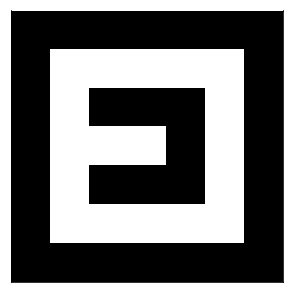

In [133]:
def maze(width=7, height=7, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(7, 7), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

## ADD2: sarsa를 이용한 gridworld, maze solve

In [134]:
import numpy as np
import matplotlib.pyplot as plt

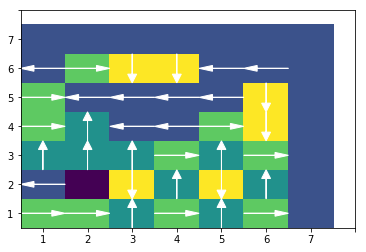

9.2599


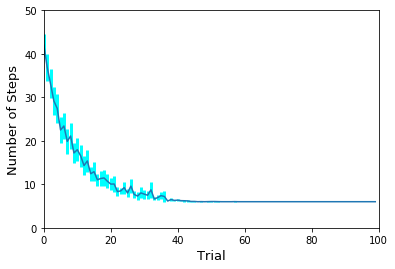

In [135]:
def directionPlot(weights):
    fig,ax=plt.subplots(1,1)
    data=np.empty((7,7))
    c=0#counter
    for x in range(6):
        for y in range(6):
            action=np.argmax(weights[:,c])
            data[x,y]=action
            
            if x==1 and y==1:
                continue
                #dont draw arrow on goal
            else:
                if action == 0: #west
                    ax.arrow(y+1,x+0.5,-0.7,0,head_width=0.2,color='w')
                elif action == 1: #north
                    ax.arrow(y+0.5,x,0,0.7,head_width=0.2,color='w')
                elif action == 2: #east
                    ax.arrow(y,x+0.5,0.7,0,head_width=0.2,color='w')
                elif action == 3: #south
                    ax.arrow(y+0.5,x+1,0,-0.7,head_width=0.2,color='w')
                elif action == 4: #NW
                    ax.arrow(y+1,x,-0.7,0.7,head_width=0.2,color='w')
                elif action == 5: #NE
                    ax.arrow(y,x,0.7,0.7,head_width=0.2,color='w')
                elif action == 6: #SW
                    ax.arrow(y+1,x+1,-0.7,-0.7,head_width=0.2,color='w')
                elif action == 7: #SE
                    ax.arrow(y,x+1,0.7,-0.7,head_width=0.2,color='w')
                
            c+=1
    data[1,1]=-1        
    #print data
    
    ax.pcolormesh(data) 
    ax.set_yticks(np.arange(0.5,8)) #set ticks midway through square
    ax.set_xticks(np.arange(0.5,8))
    ax.set_yticklabels(range(1,8))
    ax.set_xticklabels(range(1,8))
    #plt.colorbar()
    plt.draw()
    plt.show()
    
    

def homing_nn(n_trials,learning_rate,eps,gamma,decay,actions,Trace):
    n_steps = 50
    ## Definition of the environment
    N = 7                               #height of the gridworld ---> number of rows
    M = 7                               #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    
    N_actions=actions #which move set to use
    #W N E S NW NE SW SE
    action_row_change = np.array([-1,0,+1,0,-1,+1,-1,+1]) #x               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1,+1,+1,-1,-1]) #y               #number of cell shifted in horizontal as a function of the action
    
    End = np.array([3, 3])                                  #terminal state--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    #print weights
    eligibility = np.zeros((N_actions,N_states))
    #print eligibility
    learning_curve = np.zeros((1,n_trials))

    # Start trials
    for trial in range(n_trials):
        # Initialization
        Start = np.array([6,6])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0         

        # Start steps
        while s_index != s_end and step <= n_steps:
            step += 1
            learning_curve[0,trial] = step
            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector        
            #compute Qvalues. Qvalue=logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector)))    #Qvalue is 2x1 implementation of logsig
            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #1--->greedy action 0--->non-greedy action
            if eps>0:
                eps-=0.01
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action

            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]
           
            #put the robot back in grid if it goes out. 
            #robot is given a negative reward for going off the grid
            flag=False   
            if state_new[0] < 0:
                state_new[0] = 0
                flag=True
            if state_new[0] >= N:
                state_new[0] = N-1
                flag=True
            if state_new[1] < 0:
                state_new[1] = 0
                flag=True
            if state_new[1] >= M:
                state_new[1] = M-1
                flag=True

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index
                                    
            #update Qvalues
            if step >1:
                dw = learning_rate * (r_old - Q_old + gamma * Q[action]) * output_old.dot(input_old.T)
                eligibility+=output_old.dot(input_old.T)
                #use elegibility trace or not
                if Trace ==True:
                    weights+=dw*eligibility
                    eligibility *= gamma*decay
                else:
                    weights+=dw

            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1
           
            #update variables
            input_old = input_vector
            output_old = output
            Q_old = Q[action]
            if flag==False:
                r_old = 0
            else:
                r_old = -1

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            #check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw = learning_rate * (R - Q_old) * output_old.dot(input_old.T)
                eligibility+=output_old.dot(input_old.T)
                if Trace ==True:
                    weights+=dw*eligibility
                    eligibility *= gamma*decay
                else:
                    weights+=dw
      
    return learning_curve,weights


if __name__ == '__main__':
    np.random.seed(32130775)
    ##Alter these variables as needed##
    alpha =1.0#learning rate
    epsilon =0.1
    gamma =0.8
    n_trials = 100
    decay = 0.9#lambda
    actions = 4 #can be either 8 or 4 (standard or king's moves)
    Trace=True #False=SARSA, True=SARSA(lambda), Eligibility trace
    repetitions = 100   # number of episodes, should be integer, greater than 0; for statistical reasons

    totalRewards = np.zeros((repetitions,n_trials))  # reward matrix. each row contains rewards obtained in one episode
    
    fontSize = 13
    
    # Start iterations over episodes
    for j in range(repetitions):
        learning_curve,weight=homing_nn(n_trials,alpha,epsilon,gamma,decay,actions,Trace)
        totalRewards[j,:] = learning_curve
        
        if j==0:
            weights=weight
        else:
            weights=(weights+weight)/2
        if j==repetitions-1:
            directionPlot(weights)
    # Plot the average reward as a function of the number of trials --> the average has to be performed over the episodes
    plt.figure()
    means = np.mean(totalRewards, axis = 0)
    print(np.mean(means))    
    errors = 2 * np.std(totalRewards, axis = 0) / np.sqrt(repetitions) # errorbars are equal to twice standard error i.e. std/sqrt(samples)
    plt.errorbar(np.arange(n_trials), means, errors, 0, elinewidth = 3,ecolor='cyan')
    plt.axis([0,100,0,50])
    plt.xlabel('Trial',fontsize = fontSize)
    plt.ylabel('Number of Steps',fontsize = fontSize)

    plt.show()

### 1.totalRewards의 mean = 9.2599
### 2.Trial <-> Number of steps graph

### %%NOT SOLVE%%
### 1.7X7 미로를 만들었으나 6x6 미로로 인식하는 문제.
### 2.start 설정은 했으나 goal설정에서 인식못하는 문제.